<a href="https://colab.research.google.com/github/Renatotaner1988/Notebook_Heart_Disease/blob/main/Heart_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## DIAGNÓSTICO DE DOENÇAS CARDIOVASCULARES USANDO MACHINE LEARNING

## Configuração do ambiente

In [1]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

## Carga do Dataset

O conjunto de dados processados contém dados de 303 pessoas e 76 atributos. Contudo, os principais artigos e estudos publicados optaram por usar apenas 14 atributos, considerados de maior relevância. Da mesma maneira, este projeto de Data Science usará essas mesmas 14 variáveis principais.

Antes de iniciar a análise dos dados, precisamos compreender o significado de cada variável que compõe o dataset. Assim, abaixo, podemos visualizar a lista com a descrição de todos os atributos.

Informações sobre os atributos:

age - idade em anos

sex - sexo do paciente (0: mulher 1: homem)

cp - tipo da dor torácica (1: angina típica, 2: angina atípica, 3: dor não cardíaca, 4: assintomática)

trestbps - pressão arterial em repouso

chol - colesterol sérico (mg/dl)

fbs - açucar no sangue em jejum > 120mg/dl (0: False, 1: True)

restecg - resultado do eletrocardiografia de repouso (0: normal, 1: anormalidades de ST-T, 2: hipertrofia ventricular esquerda provável ou definitiva)

thalach - frequência cardíaca máxima atingida

exang - angina induzida pelo exercício (0: não, 1: sim)

oldpeak - depessão do segmento ST induzida pelo exercício em relação ao repouso

slope - inclinação do segmento ST no pico do exercício

ca - número de vasos principais colorido por fluoroscopia

thal - teste de esforço cardíaco (3: normal, 6: defeito fixo, 7: defeito reversível)
3: normal

num - diagnóstico de doença cardíaca (diagnóstico angiográfico)
  - 0: não há doença cardíaca ( < 50% de estreitamento do diâmetro)
  - 1,2,3,4: há doença cardíaca ( > 50% de estreitamento do diâmetro)

Para as análises realizadas neste projeto, a principal variável de interesse será num, uma vez que este atributo nos fornece informações se o paciente possui ou não doenças cardiovasculares.

Observando as informações sobre os atributos, percebemos que nossa variável alvo (num) possui cinco valores possíveis: [0, 1, 2, 3, 4].

No entanto, seguindo a maioria das pesquisas que utilizaram esse dataset, iremos considerar apenas duas situações possíveis:

0 - não há doença cardíaca
1 - há doença cardíaca

In [2]:
# Informa a URL de importação do dataset de doenças cardíacas
url = "https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_03/heart-disease-uci.csv"

# Lê o arquivo
dataset = pd.read_csv(url)

# Exibe as primeiras linhas do dataset
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [3]:
dataset.num.value_counts()

,count
num,
0,164
1,55
2,36
3,35
4,13


In [4]:
dataset.loc[dataset.num != 0, 'num'] = 1

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    float64
 12  thal      303 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.3 KB


In [6]:
# Exibe os nomes das colunas do dataset
print(dataset.columns)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')


In [7]:
# Separação entre variáveis explicativas (X) e alvo (y)
X = dataset.drop(columns=['num'])  # Variáveis de entrada (todas as colunas, exceto 'num')
y = dataset['num']  # Variável alvo (coluna 'num')

In [8]:
# Separação em conjunto de treino e teste com holdout
test_size = 0.20  # tamanho do conjunto de teste
seed = 7  # semente aleatória

# Divisão dos dados em treino e teste com estratificação
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, shuffle=True, random_state=seed, stratify=y)

## Separação em conjunto de treino e conjunto de teste com holdout

In [9]:
test_size = 0.20 # tamanho do conjunto de teste
seed = 7 # semente aleatória

# Separação em conjuntos de treino e teste
array = dataset.values
X = array[:,0:13]
y = array[:,13]
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=test_size, shuffle=True, random_state=seed) # holdout com estratificação

# Parâmetros e partições da validação cruzada
scoring = 'accuracy'
num_particoes = 10
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) # validação cruzada com estratificação

print(f"Tamanho de X_train: {X_train.shape}")
print(f"Tamanho de y_train: {y_train.shape}")
print(f"Tamanho de X_test: {X_test.shape}")
print(f"Tamanho de y_test: {y_test.shape}")

Tamanho de X_train: (242, 13)
Tamanho de y_train: (242,)
Tamanho de X_test: (61, 13)
Tamanho de y_test: (61,)


## Modelagem e Inferência

### Criação e avaliação de modelos: linha base

LR: 0.854833 (0.062961)
KNN: 0.618833 (0.096971)
CART: 0.764167 (0.072285)
NB: 0.838667 (0.054512)
SVM: 0.619000 (0.074756)


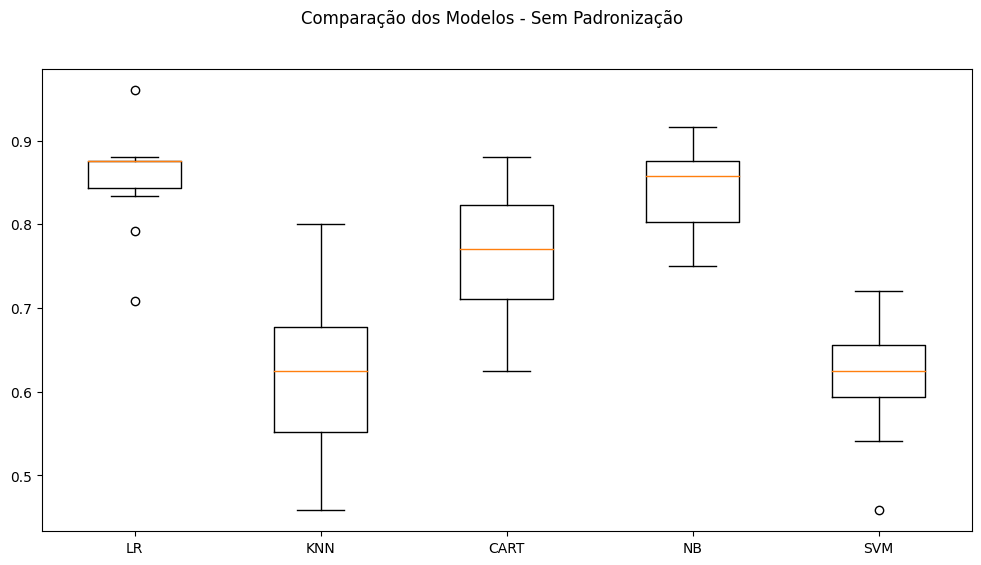

In [10]:
# Criação e avaliação dos modelos: linha base (sem padronização)
np.random.seed(7)  # semente global para reprodutibilidade

# Lista para armazenar os modelos
models = []
models.append(('LR', LogisticRegression(max_iter=200)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Avaliação de modelos utilizando validação cruzada
results = []
names = []
scoring = 'accuracy'
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=seed)

for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(12,6))
fig.suptitle('Comparação dos Modelos - Sem Padronização')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


LR-orig: 0.855 (0.063)
KNN-orig: 0.619 (0.097)
CART-orig: 0.764 (0.072)
NB-orig: 0.839 (0.055)
SVM-orig: 0.619 (0.075)
LR-padr: 0.847 (0.068)
KNN-padr: 0.814 (0.039)
CART-padr: 0.743 (0.070)
NB-padr: 0.839 (0.055)
SVM-padr: 0.847 (0.059)
LR-norm: 0.847 (0.068)
KNN-norm: 0.797 (0.059)
CART-norm: 0.747 (0.078)
NB-norm: 0.839 (0.055)
SVM-norm: 0.826 (0.064)


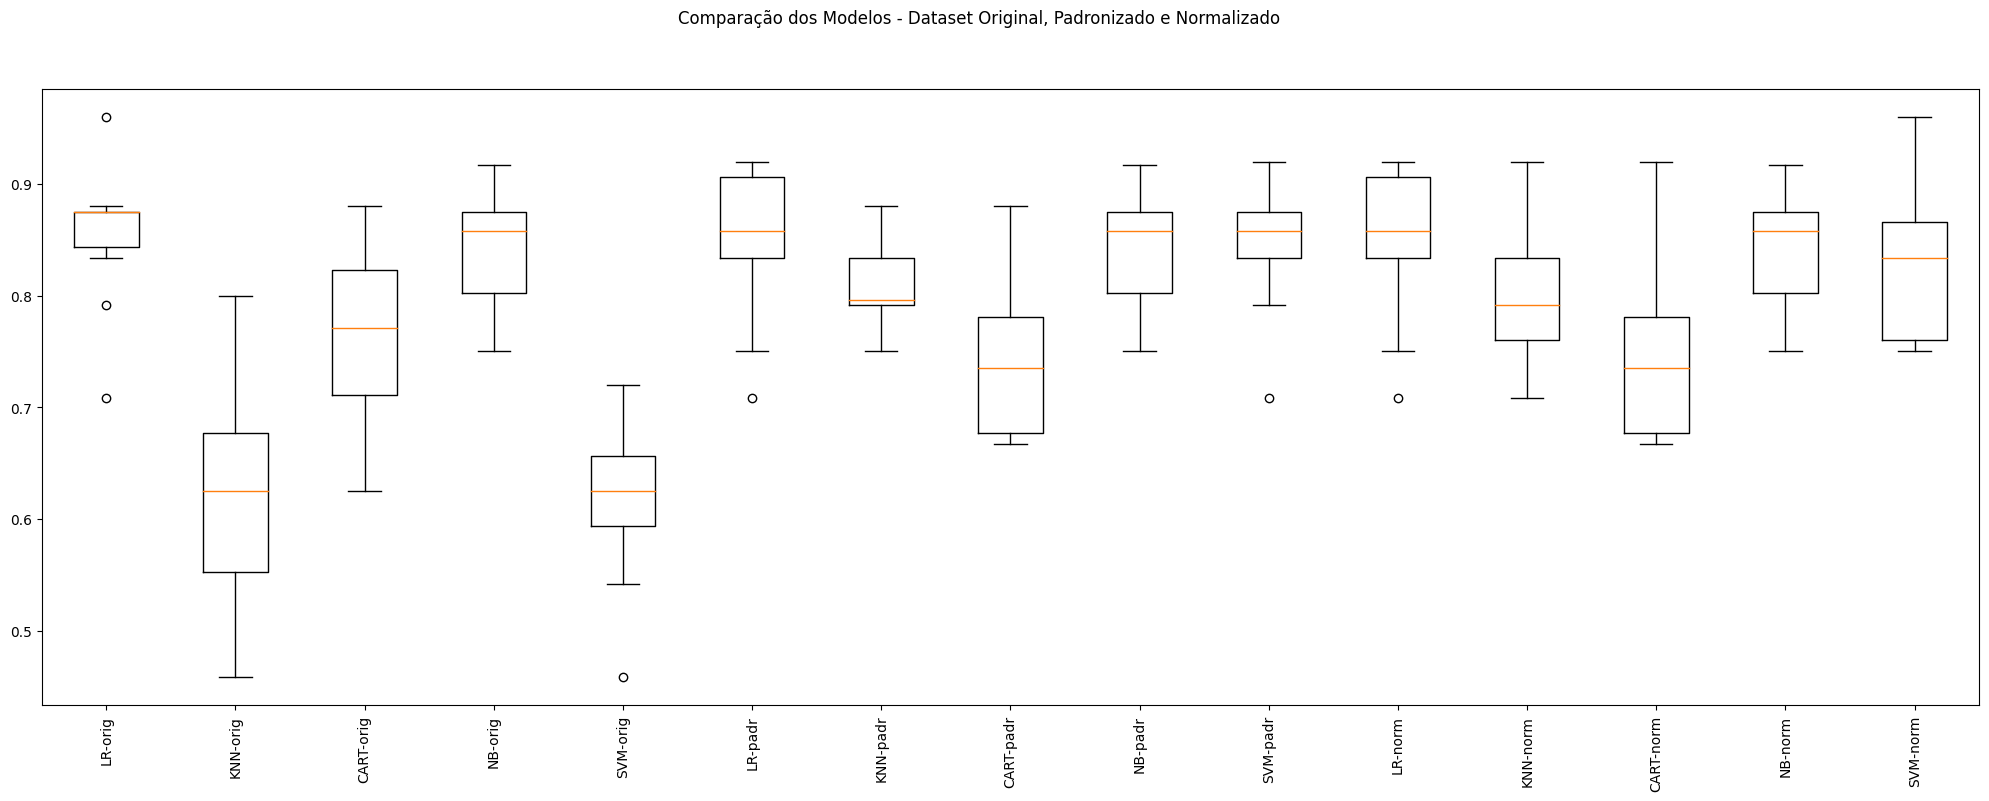

In [11]:
# Criação e avaliação de modelos: padronizados e normalizados
np.random.seed(7)

# Listas para armazenar os pipelines e os resultados
pipelines = []
results = []
names = []

# Criando os pipelines para cada abordagem: sem transformação, com padronização e com normalização

# Modelos
reg_log = ('LR', LogisticRegression(max_iter=200))
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())

# Transformações
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

# Adicionando os pipelines para dados originais
pipelines.append(('LR-orig', Pipeline([reg_log])))
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))

# Adicionando os pipelines para dados padronizados
pipelines.append(('LR-padr', Pipeline([standard_scaler, reg_log])))
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))

# Adicionando os pipelines para dados normalizados
pipelines.append(('LR-norm', Pipeline([min_max_scaler, reg_log])))
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))

# Avaliando cada pipeline
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std())  # formatando para 3 casas decimais
    print(msg)

# Boxplot para comparar os modelos com e sem pré-processamento
fig = plt.figure(figsize=(25,8))
fig.suptitle('Comparação dos Modelos - Dataset Original, Padronizado e Normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()


In [12]:
np.random.seed(7)  # Definindo uma semente global para este bloco

# Lista de modelos
models = []

# Criando os modelos e adicionando-os na lista de modelos
models.append(('LR', LogisticRegression(max_iter=200)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Definindo os parâmetros do classificador base para o BaggingClassifier
base = DecisionTreeClassifier()
num_trees = 100
max_features = 3

# Criando os modelos para o VotingClassifier
bases = []
model1 = LogisticRegression(max_iter=200)
bases.append(('logistic', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))
model3 = SVC()
bases.append(('svm', model3))

# Criando os ensembles e adicionando-os na lista de modelos
models.append(('Bagging', BaggingClassifier(estimator=base, n_estimators=num_trees)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('Ada', AdaBoostClassifier(n_estimators=num_trees)))
models.append(('GB', GradientBoostingClassifier(n_estimators=num_trees)))
models.append(('Voting', VotingClassifier(estimators=bases, voting='hard')))

# Definindo os componentes do pipeline
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

# Lista de pipelines
pipelines = []

# Criando pipelines para cada modelo
for name, model in models:
    pipelines.append((name + '-orig', Pipeline(steps=[(name, model)])))
    pipelines.append((name + '-padr', Pipeline(steps=[standard_scaler, (name, model)])))
    pipelines.append((name + '-norm', Pipeline(steps=[min_max_scaler, (name, model)])))

# Definindo os parâmetros para GridSearchCV
param_grids = {
    'LR': {
        'LR__C': [0.01, 0.1, 1, 10, 100],
        'LR__solver': ['liblinear', 'saga']
    },
    'KNN': {
        'KNN__n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21],
        'KNN__metric': ["euclidean", "manhattan", "minkowski"]
    },
    'CART': {
        'CART__max_depth': [None, 10, 20, 30, 40, 50],
        'CART__min_samples_split': [2, 5, 10],
        'CART__min_samples_leaf': [1, 2, 4]
    },
    'NB': {
        'NB__var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
    },
    'SVM': {
        'SVM__C': [0.1, 1, 10, 100],
        'SVM__gamma': [1, 0.1, 0.01, 0.001],
        'SVM__kernel': ['rbf', 'linear']
    },
    'RF': {
        'RF__n_estimators': [10, 50, 100, 200],
        'RF__max_features': ['auto', 'sqrt', 'log2'],
        'RF__max_depth': [None, 10, 20, 30],
        'RF__min_samples_split': [2, 5, 10],
        'RF__min_samples_leaf': [1, 2, 4]
    },
    'ET': {
        'ET__n_estimators': [10, 50, 100, 200],
        'ET__max_features': ['auto', 'sqrt', 'log2'],
        'ET__max_depth': [None, 10, 20, 30],
        'ET__min_samples_split': [2, 5, 10],
        'ET__min_samples_leaf': [1, 2, 4]
    },
    'Ada': {
        'Ada__n_estimators': [10, 50, 100, 200],
        'Ada__learning_rate': [0.01, 0.1, 1, 10]
    },
    'GB': {
        'GB__n_estimators': [10, 50, 100, 200],
        'GB__learning_rate': [0.01, 0.1, 0.2, 0.3],
        'GB__max_depth': [3, 5, 7, 9]
    },
    'Voting': {
        # Para VotingClassifier, geralmente não há hiperparâmetros para ajustar diretamente
        # Ajustar os hiperparâmetros dos estimadores base individualmente se necessário
    }
}

# Parâmetros de cross-validation e scoring
scoring = 'accuracy'
kfold = 5

# Executando o GridSearchCV para cada pipeline
for name, pipeline in pipelines:
    model_type = name.split('-')[0]
    if model_type in param_grids:
        param_grid = param_grids[model_type]
    else:
        param_grid = {}  # Para modelos que não têm parâmetros definidos

    grid = GridSearchCV(estimator=pipeline, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid.fit(X_train, y_train)
    # Imprimindo a melhor configuração
    print("Modelo: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))

#It took 53min


Modelo: LR-orig - Melhor: 0.863605 usando {'LR__C': 1, 'LR__solver': 'liblinear'}
Modelo: LR-padr - Melhor: 0.842942 usando {'LR__C': 0.01, 'LR__solver': 'saga'}
Modelo: LR-norm - Melhor: 0.846939 usando {'LR__C': 0.1, 'LR__solver': 'saga'}
Modelo: KNN-orig - Melhor: 0.694048 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 9}
Modelo: KNN-padr - Melhor: 0.851190 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 15}
Modelo: KNN-norm - Melhor: 0.830102 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 21}
Modelo: CART-orig - Melhor: 0.759779 usando {'CART__max_depth': None, 'CART__min_samples_leaf': 4, 'CART__min_samples_split': 2}
Modelo: CART-padr - Melhor: 0.759779 usando {'CART__max_depth': None, 'CART__min_samples_leaf': 4, 'CART__min_samples_split': 2}
Modelo: CART-norm - Melhor: 0.759779 usando {'CART__max_depth': 20, 'CART__min_samples_leaf': 4, 'CART__min_samples_split': 5}
Modelo: NB-orig - Melhor: 0.846939 usando {'NB__var_smoothing': 1e-09}
Modelo: NB-padr 

In [13]:
# Modelo: LR-orig - Melhor: 0.863605 usando {'LR__C': 1, 'LR__solver': 'liblinear'}
# Modelo: LR-padr - Melhor: 0.842942 usando {'LR__C': 0.01, 'LR__solver': 'saga'}
# Modelo: LR-norm - Melhor: 0.846939 usando {'LR__C': 0.1, 'LR__solver': 'saga'}
# Modelo: KNN-orig - Melhor: 0.694048 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 9}
# Modelo: KNN-padr - Melhor: 0.851190 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 15}
# Modelo: KNN-norm - Melhor: 0.830102 usando {'KNN__metric': 'manhattan', 'KNN__n_neighbors': 21}
# Modelo: CART-orig - Melhor: 0.759779 usando {'CART__max_depth': None, 'CART__min_samples_leaf': 4, 'CART__min_samples_split': 2}
# Modelo: CART-padr - Melhor: 0.759779 usando {'CART__max_depth': None, 'CART__min_samples_leaf': 4, 'CART__min_samples_split': 2}
# Modelo: CART-norm - Melhor: 0.759779 usando {'CART__max_depth': 20, 'CART__min_samples_leaf': 4, 'CART__min_samples_split': 5}
# Modelo: NB-orig - Melhor: 0.846939 usando {'NB__var_smoothing': 1e-09}
# Modelo: NB-padr - Melhor: 0.846939 usando {'NB__var_smoothing': 1e-09}
# Modelo: NB-norm - Melhor: 0.846939 usando {'NB__var_smoothing': 1e-09}
# Modelo: SVM-orig - Melhor: 0.826190 usando {'SVM__C': 0.1, 'SVM__gamma': 1, 'SVM__kernel': 'linear'}
# Modelo: SVM-padr - Melhor: 0.847024 usando {'SVM__C': 1, 'SVM__gamma': 0.01, 'SVM__kernel': 'rbf'}
# Modelo: SVM-norm - Melhor: 0.855272 usando {'SVM__C': 1, 'SVM__gamma': 0.01, 'SVM__kernel': 'rbf'}
# Modelo: Bagging-orig - Melhor: 0.788946 usando {}
# Modelo: Bagging-padr - Melhor: 0.809694 usando {}
# Modelo: Bagging-norm - Melhor: 0.797194 usando {}
# Modelo: RF-orig - Melhor: 0.855272 usando {'RF__max_depth': 30, 'RF__max_features': 'log2', 'RF__min_samples_leaf': 2, 'RF__min_samples_split': 5, 'RF__n_estimators': 10}
# Modelo: RF-padr - Melhor: 0.855187 usando {'RF__max_depth': 30, 'RF__max_features': 'sqrt', 'RF__min_samples_leaf': 4, 'RF__min_samples_split': 5, 'RF__n_estimators': 100}
# Modelo: RF-norm - Melhor: 0.855187 usando {'RF__max_depth': 10, 'RF__max_features': 'sqrt', 'RF__min_samples_leaf': 2, 'RF__min_samples_split': 10, 'RF__n_estimators': 100}
# Modelo: ET-orig - Melhor: 0.863690 usando {'ET__max_depth': 30, 'ET__max_features': 'sqrt', 'ET__min_samples_leaf': 1, 'ET__min_samples_split': 2, 'ET__n_estimators': 10}
# Modelo: ET-padr - Melhor: 0.855272 usando {'ET__max_depth': 10, 'ET__max_features': 'log2', 'ET__min_samples_leaf': 4, 'ET__min_samples_split': 5, 'ET__n_estimators': 50}
# Modelo: ET-norm - Melhor: 0.859354 usando {'ET__max_depth': 30, 'ET__max_features': 'sqrt', 'ET__min_samples_leaf': 4, 'ET__min_samples_split': 5, 'ET__n_estimators': 100}
# Modelo: Ada-orig - Melhor: 0.846854 usando {'Ada__learning_rate': 0.01, 'Ada__n_estimators': 200}
# Modelo: Ada-padr - Melhor: 0.846854 usando {'Ada__learning_rate': 0.01, 'Ada__n_estimators': 200}
# Modelo: Ada-norm - Melhor: 0.846854 usando {'Ada__learning_rate': 0.01, 'Ada__n_estimators': 200}
# Modelo: GB-orig - Melhor: 0.805697 usando {'GB__learning_rate': 0.3, 'GB__max_depth': 3, 'GB__n_estimators': 10}
# Modelo: GB-padr - Melhor: 0.801531 usando {'GB__learning_rate': 0.3, 'GB__max_depth': 3, 'GB__n_estimators': 10}
# Modelo: GB-norm - Melhor: 0.801531 usando {'GB__learning_rate': 0.3, 'GB__max_depth': 3, 'GB__n_estimators': 10}
# Modelo: Voting-orig - Melhor: 0.809779 usando {}
# Modelo: Voting-padr - Melhor: 0.838776 usando {}
# Modelo: Voting-norm - Melhor: 0.826190 usando {}


In [14]:
# Tuning do LR

np.random.seed(7) # definindo uma semente global para este bloco

pipelines = []

# Definindo os componentes do pipeline
lr = ('LR', LogisticRegression())
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

pipelines.append(('LR-orig', Pipeline(steps=[lr])))
pipelines.append(('LR-padr', Pipeline(steps=[standard_scaler, lr])))
pipelines.append(('LR-norm', Pipeline(steps=[min_max_scaler, lr])))

param_grid = {
    'LR__C': [0.01, 0.1, 1, 10, 100],
    'LR__solver': ['liblinear', 'saga'],
}

# Prepara e executa o GridSearchCV
for name, model in pipelines:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid.fit(X_train, y_train)
    # imprime a melhor configuração
    print("Sem tratamento de missings: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))

Sem tratamento de missings: LR-orig - Melhor: 0.863605 usando {'LR__C': 1, 'LR__solver': 'liblinear'}
Sem tratamento de missings: LR-padr - Melhor: 0.842942 usando {'LR__C': 0.01, 'LR__solver': 'saga'}
Sem tratamento de missings: LR-norm - Melhor: 0.846939 usando {'LR__C': 0.1, 'LR__solver': 'saga'}


## Finalização do Modelo

In [15]:
# Avaliação do modelo com o conjunto de testes
# Melhor modelo
#  LR-orig - Melhor: 0.863605


np.random.seed(7)

# Verificando a forma de y_train e y_test e ajustando se necessário
if len(y_train.shape) == 1:
    y_train = y_train.reshape(-1, 1)  # Transformando em array 2D, se necessário

if len(y_test.shape) == 1:
    y_test = y_test.reshape(-1, 1)  # Transformando em array 2D, se necessário

# Preparação do modelo
scaler = MinMaxScaler().fit(X_train)
rescaledX = scaler.transform(X_train)  # Aplicação da normalização no conjunto de treino

# Definindo o modelo RandomForest
model = RandomForestClassifier(
    n_estimators=50,
    max_features='sqrt',
    min_samples_split=2,
    max_depth=10,
    min_samples_leaf=1
)

# Treinando o modelo
model.fit(rescaledX, y_train.ravel())  # Usando .ravel() para garantir que y_train seja 1D

# Estimativa da acurácia no conjunto de teste
rescaledTestX = scaler.transform(X_test)  # Aplicação da normalização no conjunto de teste
predictions = model.predict(rescaledTestX)

# Exibindo a acurácia
print(accuracy_score(y_test.ravel(), predictions))  # Usando .ravel() para garantir que y_test seja 1D

0.8032786885245902


Rodando o modelo a partir de um pipeline com os hiperparâmetros otimizados.

In [16]:
np.random.seed(7)

model = RandomForestClassifier(n_estimators=50,
                               max_features='sqrt',
                               min_samples_split=2,
                               max_depth=10,
                               min_samples_leaf=1)

pipeline = Pipeline(steps=[('MinMaxScaler', MinMaxScaler()), ('RF', model)])

pipeline.fit(X_train, y_train)
predictions = pipeline.predict(X_test)
print(accuracy_score(y_test, predictions))

0.8032786885245902


## Salvando os arquivos

In [17]:
import os
import pickle
import pandas as pd

# Caminhos dos diretórios
model_dir = "../models/"
scaler_dir = "../scalers/"
pipeline_dir = "../pipelines/"
data_dir = "../data/"

# Criando os diretórios, se não existirem
os.makedirs(model_dir, exist_ok=True)
os.makedirs(scaler_dir, exist_ok=True)
os.makedirs(pipeline_dir, exist_ok=True)
os.makedirs(data_dir, exist_ok=True)

# Salvando o modelo
model_filename = 'rf_cardiaco_classifier.pkl'
with open(model_dir + model_filename, 'wb') as file:
    pickle.dump(model, file)

# Salvando o scaler
scaler_filename = 'minmax_scaler_cardiaco.pkl'
with open(scaler_dir + scaler_filename, 'wb') as file:
    pickle.dump(scaler, file)

# Salvando o pipeline
pipeline_filename = 'rf_cardiaco_pipeline.pkl'
with open(pipeline_dir + pipeline_filename, 'wb') as file:
    pickle.dump(pipeline, file)

# Salvando X_test e y_test
# X_test tem apenas as colunas correspondentes às variáveis explicativas (X)
X_test_df = pd.DataFrame(X_test, columns=dataset.columns[:-1][:13])  # Ajustando para as primeiras 8 colunas (variáveis explicativas)

# y_test é a variável alvo (apenas 1 coluna)
y_test_df = pd.DataFrame(y_test, columns=['num'])  # 'num' é a coluna alvo

X_test_df.to_csv(data_dir + "X_test_dataset_cardiaco.csv", index=False)
y_test_df.to_csv(data_dir + "y_test_dataset_cardiaco.csv", index=False)


## Simulando a aplicação do modelo em dados não vistos

In [18]:
# Preparação do modelo com TODO o dataset
scaler = MinMaxScaler().fit(X) # ajuste do scaler com TODO o dataset
rescaledX = scaler.transform(X) # aplicação da normalização com TODO o dataset
model.fit(rescaledX, y)

RandomForestClassifier(max_depth=10, n_estimators=50)

In [19]:
# Novos dados simulados - garantindo que temos apenas as 13 variáveis usadas no treinamento
# (Exemplo: você deve selecionar as mesmas colunas usadas no treinamento original)
data = {'age':  [63.0, 67.0, 41.0],       # Idade
        'sex':  [1.0, 1.0, 0.0],          # Sexo (1 = homem, 0 = mulher)
        'cp':   [1.0, 4.0, 2.0],          # Tipo de dor no peito (cp)
        'trestbps': [145.0, 120.0, 130.0], # Pressão arterial em repouso (trestbps)
        'chol': [233.0, 229.0, 204.0],     # Colesterol sérico (chol)
        'fbs': [1.0, 0.0, 0.01],
        'restecg': [2.0	, 2.0, 0.0],
        'thalach': [150.0, 129.0, 172.0],  # Frequência cardíaca máxima atingida (thalach)
        'exang': [0.0, 1.0, 0.0],
        'oldpeak': [2.3, 2.6, 1.4],  # Depressão do segmento ST (oldpeak)
        'slope': [3.0, 2.0, 1.0],
        'ca': [0.0, 2.0, 0.0],             # Número de vasos principais (ca)
        'thal': [6.0, 7.0, 3.0],
       }

# Definindo os atributos das variáveis usadas no treinamento (ajustar conforme o que foi treinado)
atributos = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

# Criando o DataFrame com os dados simulados
entrada = pd.DataFrame(data, columns=atributos)

# Convertendo os dados em um array numpy
array_entrada = entrada.values
X_entrada = array_entrada.astype(float)  # Convertendo para float

# Padronizando os dados de entrada usando o scaler utilizado anteriormente
rescaledEntradaX = scaler.transform(X_entrada)

# Exibindo os dados padronizados
print(rescaledEntradaX)

# Fazendo a predição com o modelo já treinado
predictions = model.predict(rescaledEntradaX)

# Exibindo as predições
print("Predições das classes:", predictions)


[[0.70833333 1.         0.         0.48113208 0.24429224 1.
  1.         0.60305344 0.         0.37096774 1.         0.
  0.75      ]
 [0.79166667 1.         1.         0.24528302 0.23515982 0.
  1.         0.44274809 1.         0.41935484 0.5        0.66666667
  1.        ]
 [0.25       0.         0.33333333 0.33962264 0.17808219 0.01
  0.         0.77099237 0.         0.22580645 0.         0.
  0.        ]]
Predições das classes: [0. 1. 0.]


In [20]:
# Predição de classes dos dados de entrada
saidas = model.predict(rescaledEntradaX)
print(saidas)

[0. 1. 0.]
